In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
RANDOM_SEED = 0x0

# TASK 1 Polynomial Regression (4 Points): 

Let's create and explore the data.

In [3]:
# set the random seed to an integer, so that everyone has the same data to work with
np.random.seed(seed=RANDOM_SEED)
# create predictor variable, that have standard normal distribution and reshape it in order to use for the model training
x = np.random.normal(0, 1, 100).reshape(-1, 1)
# create target variable
y = 3*x**3 + 2*x**2 + x + np.random.normal(0, 10, 100).reshape(-1, 1)

Visualise the data

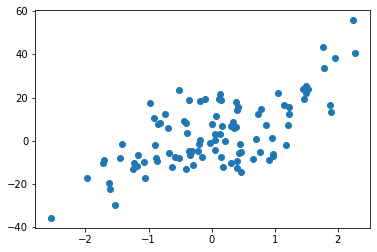

In [4]:
plt.scatter(x, y)
plt.show()

## Task 1a
Apply Linear Regression on the data


1. Split the data in the train and test set (80/20).

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_SEED)

2. Apply Linear Regression on the data and predict y values for training as well test data 

In [6]:
from sklearn.linear_model import LinearRegression 

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

3. Calculate MSE for training as well as for test data.

In [7]:

from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, y_pred)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"MSE of training data: {mse_train}")
print(f"MSE of test data: {mse_test}")

MSE of training data: 131.3354142667106
MSE of test data: 135.78381860019297


Visualize the model. Plot all the data as well as Linear Regression predictions.

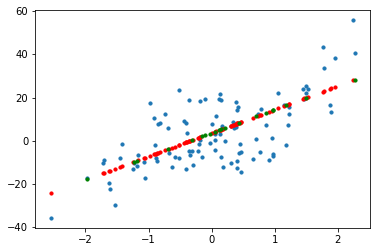

In [8]:
plt.scatter(x, y, s=10)
plt.scatter(X_train, y_pred, color='r', s=10)
plt.scatter(X_test, y_pred_test, color='g', s=10)
plt.show()

## Task 1b
Investigate how well polynomial regression with polynomial degrees = 2 can solve the task. In order to do so, follow these steps:
1. Transform the data accordingly to describe polynomial distribution of degree=2
2. Train a Linear Regression model on polynomial data
3. Make predictions for training data
4. Make predictions for test data
5. Calculate MSE for training as well as test data

In [9]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X_train)

model = LinearRegression()
model.fit(x_poly, y_train)
y_poly_pred = model.predict(x_poly)
y_poly_pred_test = model.predict(polynomial_features.fit_transform(X_test))

mse_train_poly = mean_squared_error(y_train, y_poly_pred)
mse_test_poly = mean_squared_error(y_test, y_poly_pred_test)

print(f"MSE of training data: {mse_train_poly}")
print(f"MSE of test data: {mse_test_poly}")

MSE of training data: 129.64199704420645
MSE of test data: 128.69895330783694


Did it perform better than Linear Regression? Visualize the results.

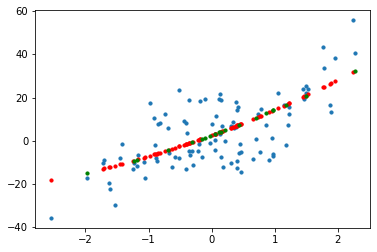

In [10]:
plt.scatter(x, y, s=10)
plt.scatter(X_train, y_poly_pred, color='r', s=10)
plt.scatter(X_test, y_poly_pred_test, color='g', s=10)
plt.show()

## Task 1c
Investigate the influence of polynomial degrees on the results. Consider degrees in range(0, 10). Plot MSE (on training as well as test data) depending on the number of the polynomial degrees. 

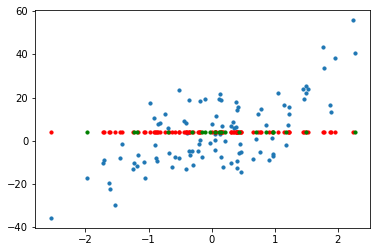

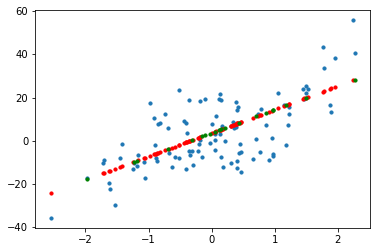

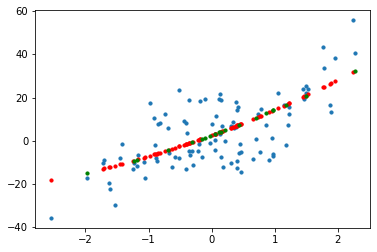

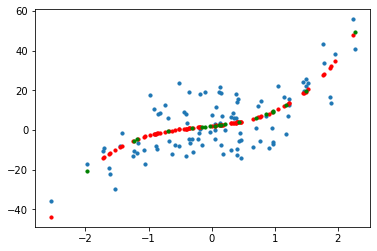

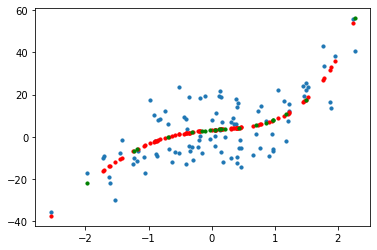

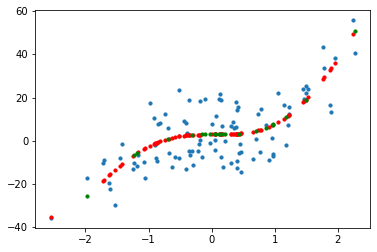

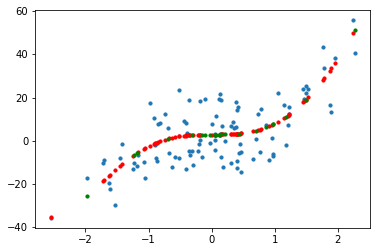

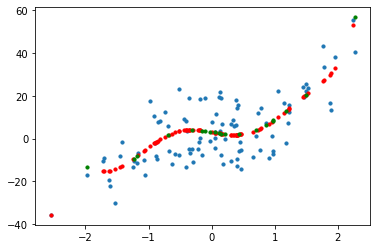

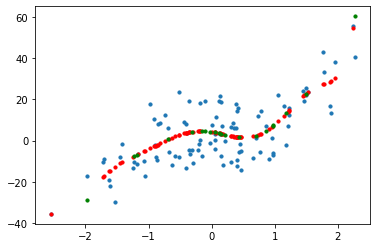

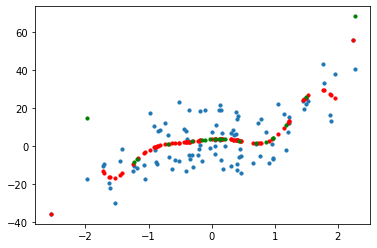

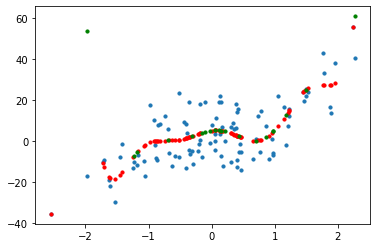

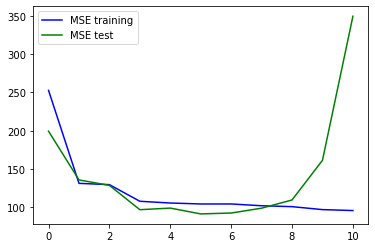

In [11]:
mse_train_list, mse_test_list = [], []
for degrees in range(0, 11):
  polynomial_features = PolynomialFeatures(degree=degrees)
  x_poly = polynomial_features.fit_transform(X_train)

  model = LinearRegression()
  model.fit(x_poly, y_train)
  y_poly_pred = model.predict(x_poly)
  y_poly_pred_test = model.predict(polynomial_features.transform(X_test))

  mse_train = mean_squared_error(y_train, y_poly_pred)
  mse_test = mean_squared_error(y_test, y_poly_pred_test)

  mse_train_list.append(mse_train)
  mse_test_list.append(mse_test)

  plt.scatter(x, y, s=10)
  plt.scatter(X_train, y_poly_pred, color='r', s=10)
  plt.scatter(X_test, y_poly_pred_test, color='g', s=10)
  plt.show()

plt.plot(range(0, 11), mse_train_list, color="blue", label="MSE training")
plt.plot(range(0, 11), mse_test_list, color="green", label="MSE test")
plt.legend()
plt.show()

What is the optimal value of the polynomial degrees? Do the values of MSE training and MSE test behave similarly? What event takes place in the models with polynomial degrees >= 8? 

Please answer these questions in Moodle. 

# Task 2: Polynomial Data Transformation (1 Point)

As we have seen in the lecture, Polynomial Regression is nothing other than a generalization of Linear Regression. Every polynomial Regression can be expressed as a Multivariate Linear Regression. Only transformation of the initial data has to be done.

 $h_\theta(a) = \theta_0 + \theta_1a_1 +\theta_2a_2 $, where
 $ a_0 = v^0, a_1 = v^1, a_2 = v^2 $

In Task 1 `sklearn.preprocessing.PolynomialFeatures` transformed the X data for us. But in order to understand what exactly it is done to the data, in this task we transform an initial data array $v$ to 
the form $(a_1...a_n)$ that can be used to build a Polynomial Regression model with polynomial degrees=2 by hand (without using `sklearn.preprocessing.PolynomialFeatures`). Please transform the array $v$ and insert your answer in Moodle.

\begin{align}
v=
\begin{bmatrix}
3 \\
2 \\
0 \\
\end{bmatrix}
\end{align}

### Solution

\begin{align}
v_{poly} =
\begin{bmatrix}
1 & 3 & 9 \\
1 & 2 & 4 \\
1 & 0 & 0 \\
\end{bmatrix}
\end{align}


In [12]:
vec1 = np.array([3, 2, 0]).reshape((3, -1))
polynomial_features = PolynomialFeatures(degree=2)
print(polynomial_features.fit_transform(vec1))

[[1. 3. 9.]
 [1. 2. 4.]
 [1. 0. 0.]]


# Task 3: Logistic Regression (6 Points)

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import randrange
import seaborn as sns
sns.set() # just the theme

## Task 3a. Data Exploration and Preprocessing

We are using the Fashion MNIST Dataset from Zalando. 
Firstly, we load the dataset.



In [14]:
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print(X_train.shape)  
print(y_train.shape)
print(X_train.dtype)
print(y_train.dtype)

ModuleNotFoundError: No module named 'keras'

In [ ]:
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In following task we will only use training part of the dataset.

#### Prepare data 
1. assign following datatypes to the arrays:
   - X_train -> 'float32'
   - y_train -> 'int64'
2. reshape X_train to 2-dimensional array. 
Note: 
   - it should have the same amount of samples/rows.
   - the pictures are in greyscale, it means they have only one value of color per pixel.
3. split the training data into (X_train, y_train) and (X_valid, y_valid), set the size of the validation dataset to 20% of the data and set random state = 42.

In [ ]:
X_train = np.array(X_train, dtype = 'float32').reshape((60000, 28*28))
y_train = np.array(y_train, dtype = 'int64')
print(X_train.shape)
print(y_train.shape)
print(X_train.dtype)
print(y_train.dtype)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_train.dtype)
print(y_train.dtype)

#### Visualize some data 
Plot 25 images (hint: use ``imshow`` and ``subplots`` from matplotlib library), plot the label as title (e.g. shorts).

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([]) # empty x-ticks
    plt.yticks([]) # empty y-ticks
    plt.grid(False)
    plt.imshow(X_train[i].reshape(28,28))
    plt.xlabel(label_names[y_train[i]])
plt.show()

#### Normalize the Images
With mean and standard deviation

In [ ]:
mean, std = np.mean(X_train), np.std(X_train)

X_train = (X_train - mean) / std
X_valid = (X_valid - mean) / std

## Task 3b. Logistic Regression
1. Fit the `LogisticRegression` from `scikit-learn`
2. Try different parameters (either by hand or by using `GridSearchCV`)


**Accuracy should be >= 0.84**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit

train_indices = np.full((X_train.shape[0],), -1, dtype=int)

test_indices = np.full((X_valid.shape[0],), 0, dtype=int)
ps = PredefinedSplit(np.append(train_indices, test_indices))

params = {'C': [1., 1.3, 1.5], 'solver': ['lbfgs', 'sag']}

clf = LogisticRegression(random_state=0, max_iter=100)
opt = GridSearchCV(clf, param_grid=params, cv=ps, refit=False)
opt.fit(np.append(X_train, X_valid, axis=0), np.append(y_train, y_valid, axis=0))
print(opt.best_params_)

In [ ]:
print(opt.cv_results_)

- Calculate the Accuracy, Precision, Recall, and F-Score on the validation set
- Print the confusion Matrix (hint: you can use function `heatmap()` of `seaborn` library)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

def evaluate_results(y_gt, y_pr):
    print("Accuracy: ", accuracy_score(y_gt, y_pr))
    print("Precision (micro): ", precision_score(y_gt, y_pr, average='micro'))
    print("Precision (macro): ", precision_score(y_gt, y_pr, average='macro'))
    print("Recall (micro): ", recall_score(y_gt, y_pr, average='micro'))
    print("Recall (macro): ", recall_score(y_gt, y_pr, average='macro'))
    print("F1 (micro): ", f1_score(y_gt, y_pr, average='micro'))
    print("F1 (macro): ", f1_score(y_gt, y_pr, average='macro'))
    
    df_cm = pd.DataFrame(confusion_matrix(y_gt, y_pr), index = label_names, columns = label_names)
    plt.figure(figsize=(10,6))
    sns.heatmap(df_cm, annot=True, fmt="d", annot_kws={"size": 10})
    plt.show()

Use the best found parameters for the next steps.

In [ ]:
clf = LogisticRegression(**opt.best_params_, random_state=0, max_iter=100)
clf.fit(X_train, y_train)
y_valid_pred = clf.predict(X_valid)

evaluate_results(y_valid, y_valid_pred)